# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0019'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
label = 1
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


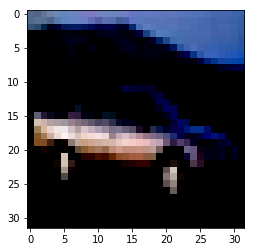

In [4]:
plt.imshow(x_train[0,:,:,:])

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [7]:
#works

gan = WGAN(input_dim = (32,32,3)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'leaky_relu'
        , discriminator_dropout_rate = None
        , discriminator_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )


gan.save(RUN_FOLDER)




In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 32, 32, 3)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 8, 8, 64)          102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
discriminator_conv_2 (Conv2D (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 16, 16, 128)       204928    
__________

## training

In [11]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
    , n_critic = 5
    , clip_threshold = 0.01
)

0 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
1 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
2 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
3 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
4 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.984, 0.000, 0.492)] [G loss: -0.0] [G acc: 0.992]
5 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.977, 0.070, 0.523)] [G loss: -0.0] [G acc: 0.883]
6 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.969, 0.094, 0.531)] [G loss: -0.0] [G acc: 0.906]
7 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.969, 0.039, 0.504)] [G loss: -0.0] [G acc: 0.891]
8 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.984, 0.219, 0.602)] [G loss: -0.0] [G acc: 0.680]
9 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.938, 0.094, 0.516)] [G loss: -0.0] [G acc: 0.719]
10 (5, 1) [D loss: (

84 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.742, 0.398, 0.570)] [G loss: -0.0] [G acc: 0.469]
85 (5, 1) [D loss: (-0.0, 0.0, 0.0)] [D acc: (0.586, 0.391, 0.488)] [G loss: -0.0] [G acc: 0.445]
86 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.562, 0.461, 0.512)] [G loss: -0.0] [G acc: 0.438]
87 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.555, 0.594, 0.574)] [G loss: 0.0] [G acc: 0.492]
88 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.492, 0.688, 0.590)] [G loss: 0.0] [G acc: 0.477]
89 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.422, 0.586, 0.504)] [G loss: 0.0] [G acc: 0.445]
90 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.391, 0.531, 0.461)] [G loss: 0.0] [G acc: 0.430]
91 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.320, 0.711, 0.516)] [G loss: 0.0] [G acc: 0.383]
92 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.281, 0.672, 0.477)] [G loss: 0.0] [G acc: 0.320]
93 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.266, 0.781, 0.523)] [G loss: 0.0] [G acc: 0.375]
94 (5, 1) [D los

167 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.602, 0.617, 0.609)] [G loss: 0.0] [G acc: 0.133]
168 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.594, 0.594, 0.594)] [G loss: 0.0] [G acc: 0.141]
169 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.586, 0.633, 0.609)] [G loss: 0.0] [G acc: 0.148]
170 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.453, 0.633, 0.543)] [G loss: 0.0] [G acc: 0.148]
171 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.516, 0.727, 0.621)] [G loss: 0.0] [G acc: 0.203]
172 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.508, 0.703, 0.605)] [G loss: 0.0] [G acc: 0.172]
173 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.531, 0.727, 0.629)] [G loss: 0.0] [G acc: 0.242]
174 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.508, 0.633, 0.570)] [G loss: 0.0] [G acc: 0.172]
175 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.562, 0.812, 0.688)] [G loss: 0.0] [G acc: 0.062]
176 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.531, 0.734, 0.633)] [G loss: 0.0] [G acc: 0.078]
1

250 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.469, 0.859, 0.664)] [G loss: 0.0] [G acc: 0.031]
251 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.492, 0.977, 0.734)] [G loss: 0.1] [G acc: 0.008]
252 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.609, 0.875, 0.742)] [G loss: 0.1] [G acc: 0.000]
253 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.656, 0.820, 0.738)] [G loss: 0.1] [G acc: 0.000]
254 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.617, 0.719, 0.668)] [G loss: 0.1] [G acc: 0.000]
255 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.648, 0.781, 0.715)] [G loss: 0.1] [G acc: 0.062]
256 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.680, 0.672, 0.676)] [G loss: 0.0] [G acc: 0.141]
257 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.602, 0.820, 0.711)] [G loss: 0.1] [G acc: 0.000]
258 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.602, 0.906, 0.754)] [G loss: 0.1] [G acc: 0.078]
259 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.586, 0.883, 0.734)] [G loss: 0.1] [G acc: 0.031]


333 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.680, 0.461, 0.570)] [G loss: 0.1] [G acc: 0.164]
334 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.664, 0.453, 0.559)] [G loss: 0.1] [G acc: 0.266]
335 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.586, 0.523, 0.555)] [G loss: 0.1] [G acc: 0.070]
336 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.703, 0.562, 0.633)] [G loss: 0.1] [G acc: 0.062]
337 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.734, 0.586, 0.660)] [G loss: 0.1] [G acc: 0.016]
338 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.727, 0.594, 0.660)] [G loss: 0.1] [G acc: 0.023]
339 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.773, 0.586, 0.680)] [G loss: 0.1] [G acc: 0.094]
340 (5, 1) [D loss: (-0.2, -0.0, -0.1)] [D acc: (0.844, 0.516, 0.680)] [G loss: 0.1] [G acc: 0.219]
341 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.820, 0.445, 0.633)] [G loss: 0.1] [G acc: 0.312]
342 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.867, 0.594, 0.730)] [G loss: 0.1] [G acc: 0.164]
343 

416 (5, 1) [D loss: (-0.4, -0.1, -0.2)] [D acc: (0.836, 0.641, 0.738)] [G loss: 0.2] [G acc: 0.172]
417 (5, 1) [D loss: (-0.5, -0.1, -0.3)] [D acc: (0.875, 0.656, 0.766)] [G loss: 0.2] [G acc: 0.164]
418 (5, 1) [D loss: (-0.4, 0.0, -0.2)] [D acc: (0.742, 0.516, 0.629)] [G loss: -0.0] [G acc: 0.477]
419 (5, 1) [D loss: (-0.3, 0.2, -0.0)] [D acc: (0.688, 0.320, 0.504)] [G loss: -0.2] [G acc: 0.617]
420 (5, 1) [D loss: (-0.2, 0.3, 0.0)] [D acc: (0.688, 0.242, 0.465)] [G loss: -0.2] [G acc: 0.633]
421 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.656, 0.398, 0.527)] [G loss: 0.1] [G acc: 0.273]
422 (5, 1) [D loss: (-0.2, -0.1, -0.2)] [D acc: (0.797, 0.820, 0.809)] [G loss: 0.3] [G acc: 0.016]
423 (5, 1) [D loss: (-0.3, -0.2, -0.2)] [D acc: (0.805, 0.805, 0.805)] [G loss: 0.4] [G acc: 0.070]
424 (5, 1) [D loss: (-0.3, -0.1, -0.2)] [D acc: (0.781, 0.711, 0.746)] [G loss: 0.3] [G acc: 0.109]
425 (5, 1) [D loss: (-0.3, -0.0, -0.2)] [D acc: (0.781, 0.594, 0.688)] [G loss: 0.2] [G acc: 0.164]
42

499 (5, 1) [D loss: (-0.8, 0.5, -0.2)] [D acc: (0.898, 0.133, 0.516)] [G loss: -0.4] [G acc: 0.828]
500 (5, 1) [D loss: (-0.7, 0.4, -0.2)] [D acc: (0.859, 0.375, 0.617)] [G loss: -0.5] [G acc: 0.688]
501 (5, 1) [D loss: (-0.9, 1.0, 0.0)] [D acc: (0.961, 0.102, 0.531)] [G loss: -0.5] [G acc: 0.812]
502 (5, 1) [D loss: (-0.8, 0.6, -0.1)] [D acc: (0.969, 0.047, 0.508)] [G loss: -0.2] [G acc: 0.742]
503 (5, 1) [D loss: (-0.7, 0.3, -0.2)] [D acc: (0.969, 0.266, 0.617)] [G loss: 0.1] [G acc: 0.320]
504 (5, 1) [D loss: (-0.6, 0.3, -0.1)] [D acc: (0.844, 0.359, 0.602)] [G loss: -0.1] [G acc: 0.578]
505 (5, 1) [D loss: (-0.7, 0.6, -0.1)] [D acc: (0.875, 0.227, 0.551)] [G loss: -0.2] [G acc: 0.617]
506 (5, 1) [D loss: (-0.7, 0.4, -0.1)] [D acc: (0.844, 0.305, 0.574)] [G loss: -0.3] [G acc: 0.695]
507 (5, 1) [D loss: (-0.8, 0.6, -0.1)] [D acc: (0.922, 0.102, 0.512)] [G loss: -0.4] [G acc: 0.812]
508 (5, 1) [D loss: (-0.7, 0.6, -0.1)] [D acc: (0.953, 0.062, 0.508)] [G loss: -0.4] [G acc: 0.836]
50

582 (5, 1) [D loss: (-0.5, 0.3, -0.1)] [D acc: (0.789, 0.305, 0.547)] [G loss: -0.4] [G acc: 0.750]
583 (5, 1) [D loss: (-0.4, 0.4, -0.0)] [D acc: (0.797, 0.141, 0.469)] [G loss: -0.4] [G acc: 0.891]
584 (5, 1) [D loss: (-0.4, 0.4, -0.0)] [D acc: (0.719, 0.281, 0.500)] [G loss: -0.3] [G acc: 0.750]
585 (5, 1) [D loss: (-0.4, 0.3, -0.0)] [D acc: (0.812, 0.086, 0.449)] [G loss: -0.1] [G acc: 0.578]
586 (5, 1) [D loss: (-0.6, 0.4, -0.1)] [D acc: (0.891, 0.117, 0.504)] [G loss: -0.0] [G acc: 0.484]
587 (5, 1) [D loss: (-0.6, 0.4, -0.1)] [D acc: (0.914, 0.172, 0.543)] [G loss: -0.1] [G acc: 0.727]
588 (5, 1) [D loss: (-0.6, 0.5, -0.1)] [D acc: (0.961, 0.047, 0.504)] [G loss: -0.1] [G acc: 0.656]
589 (5, 1) [D loss: (-0.7, 0.5, -0.1)] [D acc: (0.969, 0.031, 0.500)] [G loss: -0.1] [G acc: 0.672]
590 (5, 1) [D loss: (-0.7, 0.4, -0.1)] [D acc: (0.906, 0.094, 0.500)] [G loss: -0.2] [G acc: 0.734]
591 (5, 1) [D loss: (-0.6, 0.4, -0.1)] [D acc: (0.820, 0.242, 0.531)] [G loss: -0.2] [G acc: 0.664]


665 (5, 1) [D loss: (-0.5, 0.2, -0.1)] [D acc: (0.773, 0.359, 0.566)] [G loss: 0.0] [G acc: 0.398]
666 (5, 1) [D loss: (-0.5, 0.1, -0.2)] [D acc: (0.797, 0.445, 0.621)] [G loss: 0.1] [G acc: 0.414]
667 (5, 1) [D loss: (-0.4, 0.3, -0.1)] [D acc: (0.766, 0.281, 0.523)] [G loss: 0.2] [G acc: 0.203]
668 (5, 1) [D loss: (-0.3, 0.2, -0.1)] [D acc: (0.688, 0.445, 0.566)] [G loss: 0.1] [G acc: 0.336]
669 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.570, 0.523, 0.547)] [G loss: 0.3] [G acc: 0.188]
670 (5, 1) [D loss: (-0.1, -0.3, -0.2)] [D acc: (0.570, 0.758, 0.664)] [G loss: 0.5] [G acc: 0.102]
671 (5, 1) [D loss: (-0.0, -0.3, -0.2)] [D acc: (0.586, 0.719, 0.652)] [G loss: 0.5] [G acc: 0.086]
672 (5, 1) [D loss: (0.0, -0.2, -0.1)] [D acc: (0.391, 0.656, 0.523)] [G loss: 0.5] [G acc: 0.125]
673 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.555, 0.586, 0.570)] [G loss: 0.3] [G acc: 0.211]
674 (5, 1) [D loss: (-0.0, 0.1, 0.0)] [D acc: (0.508, 0.398, 0.453)] [G loss: 0.2] [G acc: 0.227]
675 (5, 

748 (5, 1) [D loss: (-0.2, -0.1, -0.2)] [D acc: (0.758, 0.531, 0.645)] [G loss: 0.3] [G acc: 0.219]
749 (5, 1) [D loss: (-0.3, 0.2, -0.1)] [D acc: (0.812, 0.352, 0.582)] [G loss: 0.2] [G acc: 0.359]
750 (5, 1) [D loss: (-0.2, 0.2, 0.0)] [D acc: (0.711, 0.297, 0.504)] [G loss: 0.1] [G acc: 0.445]
751 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.625, 0.383, 0.504)] [G loss: 0.0] [G acc: 0.547]
752 (5, 1) [D loss: (-0.2, 0.3, 0.0)] [D acc: (0.695, 0.227, 0.461)] [G loss: 0.0] [G acc: 0.492]
753 (5, 1) [D loss: (-0.3, 0.1, -0.1)] [D acc: (0.578, 0.484, 0.531)] [G loss: 0.1] [G acc: 0.328]
754 (5, 1) [D loss: (-0.3, 0.2, -0.1)] [D acc: (0.812, 0.219, 0.516)] [G loss: 0.1] [G acc: 0.445]
755 (5, 1) [D loss: (-0.4, 0.2, -0.1)] [D acc: (0.797, 0.242, 0.520)] [G loss: 0.1] [G acc: 0.375]
756 (5, 1) [D loss: (-0.4, 0.2, -0.1)] [D acc: (0.812, 0.305, 0.559)] [G loss: 0.0] [G acc: 0.477]
757 (5, 1) [D loss: (-0.4, 0.3, -0.0)] [D acc: (0.734, 0.250, 0.492)] [G loss: -0.1] [G acc: 0.531]
758 (5, 1)

831 (5, 1) [D loss: (-0.4, 0.2, -0.1)] [D acc: (0.820, 0.305, 0.562)] [G loss: -0.0] [G acc: 0.492]
832 (5, 1) [D loss: (-0.3, 0.3, -0.0)] [D acc: (0.883, 0.320, 0.602)] [G loss: 0.0] [G acc: 0.250]
833 (5, 1) [D loss: (-0.2, 0.3, 0.0)] [D acc: (0.805, 0.312, 0.559)] [G loss: 0.2] [G acc: 0.195]
834 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.633, 0.531, 0.582)] [G loss: 0.3] [G acc: 0.195]
835 (5, 1) [D loss: (-0.1, -0.2, -0.2)] [D acc: (0.641, 0.703, 0.672)] [G loss: 0.3] [G acc: 0.234]
836 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.711, 0.414, 0.562)] [G loss: 0.1] [G acc: 0.328]
837 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.727, 0.297, 0.512)] [G loss: 0.1] [G acc: 0.375]
838 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.617, 0.438, 0.527)] [G loss: 0.1] [G acc: 0.375]
839 (5, 1) [D loss: (-0.3, 0.1, -0.1)] [D acc: (0.766, 0.336, 0.551)] [G loss: 0.1] [G acc: 0.281]
840 (5, 1) [D loss: (-0.4, 0.2, -0.1)] [D acc: (0.797, 0.383, 0.590)] [G loss: 0.0] [G acc: 0.414]
841 (5, 

914 (5, 1) [D loss: (-0.2, 0.3, 0.0)] [D acc: (0.727, 0.195, 0.461)] [G loss: 0.0] [G acc: 0.438]
915 (5, 1) [D loss: (-0.3, 0.2, -0.0)] [D acc: (0.828, 0.211, 0.520)] [G loss: 0.0] [G acc: 0.391]
916 (5, 1) [D loss: (-0.3, 0.2, -0.0)] [D acc: (0.820, 0.305, 0.562)] [G loss: 0.1] [G acc: 0.273]
917 (5, 1) [D loss: (-0.2, 0.2, -0.0)] [D acc: (0.875, 0.305, 0.590)] [G loss: 0.1] [G acc: 0.289]
918 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.758, 0.516, 0.637)] [G loss: 0.2] [G acc: 0.148]
919 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.641, 0.531, 0.586)] [G loss: 0.2] [G acc: 0.125]
920 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.531, 0.680, 0.605)] [G loss: 0.3] [G acc: 0.102]
921 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.508, 0.711, 0.609)] [G loss: 0.2] [G acc: 0.094]
922 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.641, 0.625, 0.633)] [G loss: 0.2] [G acc: 0.148]
923 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.742, 0.383, 0.562)] [G loss: 0.1] [G acc: 0.195]
924 (5,

997 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.570, 0.680, 0.625)] [G loss: 0.1] [G acc: 0.359]
998 (5, 1) [D loss: (-0.1, 0.1, 0.0)] [D acc: (0.680, 0.305, 0.492)] [G loss: 0.1] [G acc: 0.219]
999 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.523, 0.570, 0.547)] [G loss: 0.1] [G acc: 0.141]
1000 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.719, 0.445, 0.582)] [G loss: 0.1] [G acc: 0.219]
1001 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.727, 0.500, 0.613)] [G loss: 0.2] [G acc: 0.156]
1002 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.766, 0.570, 0.668)] [G loss: 0.2] [G acc: 0.047]
1003 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.656, 0.719, 0.688)] [G loss: 0.2] [G acc: 0.039]
1004 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.758, 0.539, 0.648)] [G loss: 0.2] [G acc: 0.125]
1005 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.742, 0.438, 0.590)] [G loss: 0.1] [G acc: 0.258]
1006 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.766, 0.453, 0.609)] [G loss: 0.1] [G acc: 0.172]

1079 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.703, 0.359, 0.531)] [G loss: 0.1] [G acc: 0.242]
1080 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.656, 0.445, 0.551)] [G loss: 0.1] [G acc: 0.312]
1081 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.688, 0.508, 0.598)] [G loss: 0.1] [G acc: 0.164]
1082 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.695, 0.438, 0.566)] [G loss: 0.1] [G acc: 0.195]
1083 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.766, 0.414, 0.590)] [G loss: 0.1] [G acc: 0.242]
1084 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.766, 0.367, 0.566)] [G loss: 0.1] [G acc: 0.328]
1085 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.766, 0.398, 0.582)] [G loss: 0.1] [G acc: 0.172]
1086 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.750, 0.344, 0.547)] [G loss: 0.1] [G acc: 0.500]
1087 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.867, 0.289, 0.578)] [G loss: 0.0] [G acc: 0.383]
1088 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.922, 0.117, 0.520)] [G loss: 0.0] [G acc: 0.406]


1161 (5, 1) [D loss: (-0.2, 0.2, -0.0)] [D acc: (0.953, 0.086, 0.520)] [G loss: 0.0] [G acc: 0.398]
1162 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.797, 0.195, 0.496)] [G loss: 0.0] [G acc: 0.500]
1163 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.812, 0.312, 0.562)] [G loss: 0.1] [G acc: 0.289]
1164 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.867, 0.203, 0.535)] [G loss: 0.1] [G acc: 0.258]
1165 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.797, 0.367, 0.582)] [G loss: 0.0] [G acc: 0.539]
1166 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.734, 0.469, 0.602)] [G loss: 0.0] [G acc: 0.273]
1167 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.695, 0.531, 0.613)] [G loss: -0.1] [G acc: 0.383]
1168 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.828, 0.344, 0.586)] [G loss: -0.0] [G acc: 0.469]
1169 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.766, 0.336, 0.551)] [G loss: 0.0] [G acc: 0.469]
1170 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.750, 0.391, 0.570)] [G loss: -0.0] [G acc: 0.44

1243 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.672, 0.633, 0.652)] [G loss: 0.1] [G acc: 0.242]
1244 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.602, 0.602, 0.602)] [G loss: 0.1] [G acc: 0.367]
1245 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.742, 0.492, 0.617)] [G loss: 0.1] [G acc: 0.305]
1246 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.672, 0.461, 0.566)] [G loss: 0.1] [G acc: 0.305]
1247 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.695, 0.461, 0.578)] [G loss: -0.0] [G acc: 0.516]
1248 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.688, 0.320, 0.504)] [G loss: 0.0] [G acc: 0.469]
1249 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.781, 0.273, 0.527)] [G loss: 0.0] [G acc: 0.570]
1250 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.805, 0.344, 0.574)] [G loss: 0.0] [G acc: 0.422]
1251 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.852, 0.344, 0.598)] [G loss: 0.1] [G acc: 0.297]
1252 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.891, 0.211, 0.551)] [G loss: 0.1] [G acc: 0.29

1325 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.750, 0.422, 0.586)] [G loss: 0.0] [G acc: 0.453]
1326 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.758, 0.500, 0.629)] [G loss: 0.0] [G acc: 0.508]
1327 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.719, 0.398, 0.559)] [G loss: 0.1] [G acc: 0.367]
1328 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.727, 0.469, 0.598)] [G loss: 0.0] [G acc: 0.484]
1329 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.680, 0.422, 0.551)] [G loss: 0.1] [G acc: 0.422]
1330 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.727, 0.484, 0.605)] [G loss: 0.0] [G acc: 0.383]
1331 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.688, 0.375, 0.531)] [G loss: 0.1] [G acc: 0.312]
1332 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.750, 0.375, 0.562)] [G loss: 0.1] [G acc: 0.188]
1333 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.773, 0.352, 0.562)] [G loss: 0.1] [G acc: 0.219]
1334 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.633, 0.531, 0.582)] [G loss: 0.0] [G acc: 0.469]


1407 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.727, 0.555, 0.641)] [G loss: 0.0] [G acc: 0.422]
1408 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.734, 0.289, 0.512)] [G loss: 0.1] [G acc: 0.391]
1409 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.703, 0.477, 0.590)] [G loss: 0.1] [G acc: 0.219]
1410 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.555, 0.594, 0.574)] [G loss: 0.1] [G acc: 0.273]
1411 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.523, 0.633, 0.578)] [G loss: 0.2] [G acc: 0.094]
1412 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.422, 0.797, 0.609)] [G loss: 0.2] [G acc: 0.062]
1413 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.531, 0.742, 0.637)] [G loss: 0.2] [G acc: 0.023]
1414 (5, 1) [D loss: (0.0, -0.1, -0.1)] [D acc: (0.523, 0.641, 0.582)] [G loss: 0.2] [G acc: 0.242]
1415 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.602, 0.531, 0.566)] [G loss: 0.1] [G acc: 0.242]
1416 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.430, 0.578, 0.504)] [G loss: 0.1] [G acc: 0.11

1489 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.664, 0.688, 0.676)] [G loss: 0.2] [G acc: 0.203]
1490 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.711, 0.695, 0.703)] [G loss: 0.1] [G acc: 0.266]
1491 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.617, 0.570, 0.594)] [G loss: 0.0] [G acc: 0.438]
1492 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.656, 0.383, 0.520)] [G loss: -0.0] [G acc: 0.594]
1493 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.719, 0.336, 0.527)] [G loss: 0.0] [G acc: 0.523]
1494 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.695, 0.305, 0.500)] [G loss: 0.1] [G acc: 0.258]
1495 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.812, 0.375, 0.594)] [G loss: 0.1] [G acc: 0.117]
1496 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.797, 0.398, 0.598)] [G loss: 0.1] [G acc: 0.172]
1497 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.742, 0.414, 0.578)] [G loss: 0.0] [G acc: 0.352]
1498 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.883, 0.461, 0.672)] [G loss: 0.0] [G acc: 0.3

1571 (5, 1) [D loss: (-0.2, -0.0, -0.1)] [D acc: (0.852, 0.469, 0.660)] [G loss: 0.1] [G acc: 0.438]
1572 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.734, 0.422, 0.578)] [G loss: 0.1] [G acc: 0.242]
1573 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.641, 0.430, 0.535)] [G loss: 0.1] [G acc: 0.312]
1574 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.656, 0.555, 0.605)] [G loss: 0.1] [G acc: 0.375]
1575 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.609, 0.539, 0.574)] [G loss: 0.1] [G acc: 0.305]
1576 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.539, 0.594, 0.566)] [G loss: 0.0] [G acc: 0.398]
1577 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.570, 0.477, 0.523)] [G loss: 0.0] [G acc: 0.453]
1578 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.766, 0.383, 0.574)] [G loss: 0.1] [G acc: 0.367]
1579 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.734, 0.430, 0.582)] [G loss: 0.1] [G acc: 0.289]
1580 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.852, 0.430, 0.641)] [G loss: 0.1] [G acc: 0.43

1653 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.852, 0.375, 0.613)] [G loss: 0.2] [G acc: 0.109]
1654 (5, 1) [D loss: (-0.3, 0.1, -0.1)] [D acc: (0.891, 0.438, 0.664)] [G loss: 0.2] [G acc: 0.109]
1655 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.680, 0.492, 0.586)] [G loss: 0.1] [G acc: 0.258]
1656 (5, 1) [D loss: (-0.3, 0.1, -0.1)] [D acc: (0.820, 0.453, 0.637)] [G loss: 0.1] [G acc: 0.250]
1657 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.805, 0.477, 0.641)] [G loss: 0.1] [G acc: 0.250]
1658 (5, 1) [D loss: (-0.3, 0.0, -0.1)] [D acc: (0.695, 0.516, 0.605)] [G loss: 0.1] [G acc: 0.312]
1659 (5, 1) [D loss: (-0.2, -0.0, -0.1)] [D acc: (0.727, 0.555, 0.641)] [G loss: 0.0] [G acc: 0.523]
1660 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.672, 0.594, 0.633)] [G loss: -0.0] [G acc: 0.422]
1661 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.586, 0.641, 0.613)] [G loss: 0.1] [G acc: 0.398]
1662 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.547, 0.586, 0.566)] [G loss: 0.0] [G acc: 0.35

1735 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.742, 0.469, 0.605)] [G loss: -0.2] [G acc: 0.648]
1736 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.758, 0.469, 0.613)] [G loss: -0.2] [G acc: 0.609]
1737 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.727, 0.523, 0.625)] [G loss: 0.0] [G acc: 0.328]
1738 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.633, 0.500, 0.566)] [G loss: 0.3] [G acc: 0.117]
1739 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.516, 0.711, 0.613)] [G loss: 0.3] [G acc: 0.070]
1740 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.508, 0.750, 0.629)] [G loss: 0.4] [G acc: 0.039]
1741 (5, 1) [D loss: (0.0, -0.2, -0.1)] [D acc: (0.375, 0.844, 0.609)] [G loss: 0.3] [G acc: 0.125]
1742 (5, 1) [D loss: (0.0, -0.2, -0.1)] [D acc: (0.594, 0.773, 0.684)] [G loss: 0.3] [G acc: 0.086]
1743 (5, 1) [D loss: (0.0, -0.2, -0.1)] [D acc: (0.461, 0.703, 0.582)] [G loss: 0.3] [G acc: 0.234]
1744 (5, 1) [D loss: (-0.0, -0.2, -0.1)] [D acc: (0.562, 0.758, 0.660)] [G loss: 0.2] [G acc: 0

1817 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.539, 0.586, 0.562)] [G loss: 0.2] [G acc: 0.336]
1818 (5, 1) [D loss: (-0.1, -0.2, -0.1)] [D acc: (0.617, 0.703, 0.660)] [G loss: 0.2] [G acc: 0.266]
1819 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.594, 0.625, 0.609)] [G loss: 0.1] [G acc: 0.320]
1820 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.531, 0.586, 0.559)] [G loss: 0.1] [G acc: 0.430]
1821 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.656, 0.414, 0.535)] [G loss: 0.1] [G acc: 0.484]
1822 (5, 1) [D loss: (0.0, -0.0, 0.0)] [D acc: (0.531, 0.484, 0.508)] [G loss: 0.1] [G acc: 0.445]
1823 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.633, 0.484, 0.559)] [G loss: 0.0] [G acc: 0.508]
1824 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.641, 0.383, 0.512)] [G loss: 0.1] [G acc: 0.406]
1825 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.688, 0.352, 0.520)] [G loss: 0.0] [G acc: 0.383]
1826 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.773, 0.312, 0.543)] [G loss: 0.1] [G acc: 0.2

1899 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.836, 0.430, 0.633)] [G loss: 0.1] [G acc: 0.500]
1900 (5, 1) [D loss: (-0.3, 0.1, -0.1)] [D acc: (0.852, 0.359, 0.605)] [G loss: 0.2] [G acc: 0.359]
1901 (5, 1) [D loss: (-0.3, 0.1, -0.1)] [D acc: (0.789, 0.406, 0.598)] [G loss: 0.2] [G acc: 0.273]
1902 (5, 1) [D loss: (-0.3, 0.0, -0.1)] [D acc: (0.789, 0.445, 0.617)] [G loss: 0.1] [G acc: 0.422]
1903 (5, 1) [D loss: (-0.4, 0.2, -0.1)] [D acc: (0.844, 0.367, 0.605)] [G loss: -0.0] [G acc: 0.539]
1904 (5, 1) [D loss: (-0.3, 0.1, -0.1)] [D acc: (0.734, 0.328, 0.531)] [G loss: -0.1] [G acc: 0.586]
1905 (5, 1) [D loss: (-0.3, 0.2, -0.1)] [D acc: (0.758, 0.328, 0.543)] [G loss: -0.1] [G acc: 0.633]
1906 (5, 1) [D loss: (-0.3, 0.2, -0.1)] [D acc: (0.820, 0.352, 0.586)] [G loss: -0.2] [G acc: 0.594]
1907 (5, 1) [D loss: (-0.3, 0.2, -0.0)] [D acc: (0.695, 0.391, 0.543)] [G loss: -0.2] [G acc: 0.578]
1908 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.742, 0.406, 0.574)] [G loss: -0.1] [G acc: 0

1981 (5, 1) [D loss: (-0.1, -0.2, -0.1)] [D acc: (0.688, 0.672, 0.680)] [G loss: 0.5] [G acc: 0.117]
1982 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.641, 0.609, 0.625)] [G loss: 0.4] [G acc: 0.188]
1983 (5, 1) [D loss: (-0.1, -0.2, -0.1)] [D acc: (0.625, 0.656, 0.641)] [G loss: 0.3] [G acc: 0.289]
1984 (5, 1) [D loss: (-0.1, -0.2, -0.1)] [D acc: (0.656, 0.617, 0.637)] [G loss: 0.2] [G acc: 0.398]
1985 (5, 1) [D loss: (-0.1, -0.2, -0.2)] [D acc: (0.688, 0.641, 0.664)] [G loss: 0.1] [G acc: 0.438]
1986 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.680, 0.531, 0.605)] [G loss: 0.0] [G acc: 0.578]
1987 (5, 1) [D loss: (0.0, -0.0, 0.0)] [D acc: (0.555, 0.461, 0.508)] [G loss: -0.0] [G acc: 0.680]
1988 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.656, 0.312, 0.484)] [G loss: -0.1] [G acc: 0.703]
1989 (5, 1) [D loss: (-0.1, 0.1, -0.0)] [D acc: (0.664, 0.352, 0.508)] [G loss: -0.2] [G acc: 0.703]
1990 (5, 1) [D loss: (-0.2, 0.1, -0.0)] [D acc: (0.703, 0.383, 0.543)] [G loss: -0.1] [G acc

In [20]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
gan.discriminator.predict(np.array([x_train[idx]]))

array([[0.36783013]], dtype=float32)

In [21]:
noise = np.random.normal(0, 1, (1, gan.z_dim))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.predict(np.array([gen_imgs[0]]))

array([[0.71810865]], dtype=float32)

In [22]:
gan.train_discriminator(x_train, batch_size = 32, clip_threshold = 0.01)

((-0.20919323, 0.18323934, -0.01297694444656372), (0.78125, 0.40625, 0.59375))

In [23]:
fake = np.ones((128,1))
noise = np.random.normal(0, 1, (128, 100))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.train_on_batch(gen_imgs, fake)

[0.10318804, 0.515625]

In [24]:
[(np.min(x), np.max(x)) for x in gan.discriminator.get_weights()]

[(-0.010066482, 0.010083993),
 (-0.010063418, -9.007043e-05),
 (-0.010115947, 0.010110711),
 (-0.009815445, 0.010046954),
 (-0.010103431, 0.010112199),
 (0.001303335, 0.010087497),
 (-0.010118759, 0.010133311),
 (0.004370139, 0.01007336),
 (-0.010076795, 0.009922579),
 (-3.0277566e-05, -3.0277566e-05)]

In [17]:
gan.train_generator(batch_size = 128)

[-0.22928005, 0.671875]

In [18]:
[np.round((np.min(x), np.max(x)), 4) for x in gan.generator.get_weights()]

[array([-0.0983,  0.0882], dtype=float32),
 array([-1.e-04,  1.e-04], dtype=float32),
 array([0.973 , 1.0317], dtype=float32),
 array([-0.0237,  0.0344], dtype=float32),
 array([-0.0193,  0.0166], dtype=float32),
 array([0.0241, 0.0636], dtype=float32),
 array([-0.0904,  0.0838], dtype=float32),
 array([-0.0006,  0.0004], dtype=float32),
 array([0.9877, 1.0141], dtype=float32),
 array([-0.0097,  0.0156], dtype=float32),
 array([-1.5358,  0.9621], dtype=float32),
 array([0.212 , 0.5838], dtype=float32),
 array([-0.0948,  0.091 ], dtype=float32),
 array([-0.0012,  0.0012], dtype=float32),
 array([0.9832, 1.0151], dtype=float32),
 array([-0.0174,  0.0114], dtype=float32),
 array([-1.9347,  0.8211], dtype=float32),
 array([0.4667, 5.2959], dtype=float32),
 array([-0.0997,  0.0887], dtype=float32),
 array([-0.0026,  0.0028], dtype=float32),
 array([0.9817, 1.0094], dtype=float32),
 array([-0.0148,  0.0035], dtype=float32),
 array([-0.4586,  0.7988], dtype=float32),
 array([0.1917, 2.3501], 

In [19]:
plt.imshow(np.clip((x[200]+1)*0.5,0,1))

NameError: name 'x' is not defined

In [ ]:
gan.discriminator.predict(x)

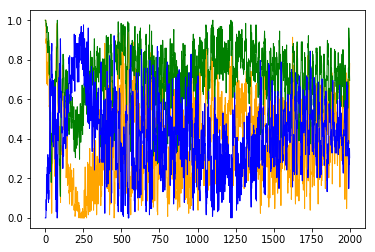

In [25]:
plt.plot(g_accs, color='orange', linewidth=1)
plt.plot([x[0] for x in d_accs], color='green', linewidth=1)
plt.plot([x[1] for x in d_accs], color='blue', linewidth=1)



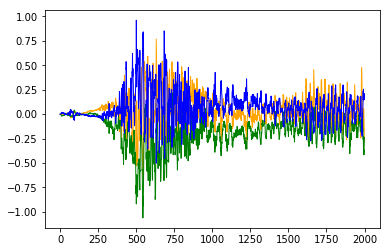

In [26]:
plt.plot(g_losses, color='orange', linewidth=1)
plt.plot([x[0] for x in d_losses], color='green', linewidth=1)
plt.plot([x[1] for x in d_losses], color='blue', linewidth=1)


In [ ]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(np.clip((img+1)*0.5,0,1))

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.generator.get_weights()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [28]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))